In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

# Агрегирование и группировка 

In [4]:
# информация об открытых астрономами планетах, вращающихся вокруг других звезд (более чем 1000 планет)
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [5]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
# расчет сводных показателей
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


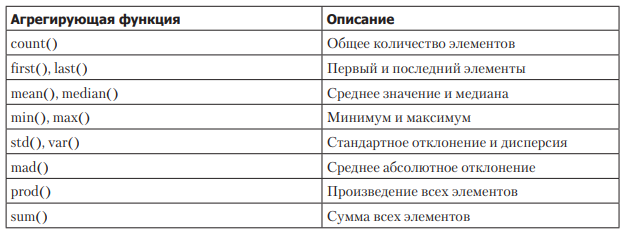

### GroupBy: разбиение, применение, объединение

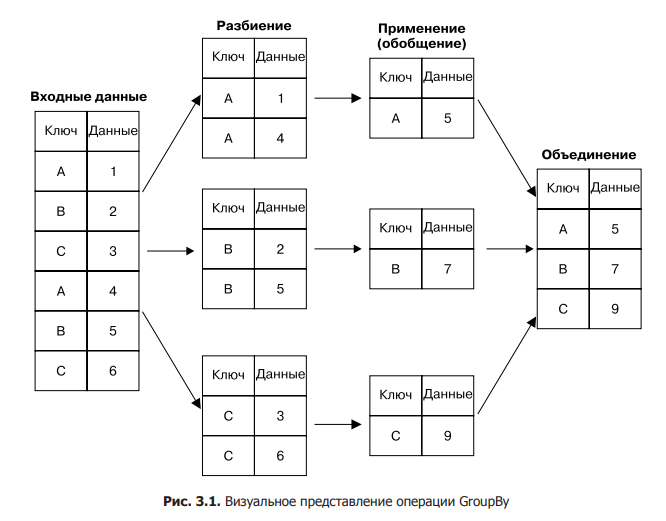

In [5]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'data': range(6)}, columns=['key', 'data'])
df.groupby('key')  # возвращает объект DataFrameGroupBy

In [8]:
# индексация по столбцам
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [11]:
# цикл по группам
for (method, group) in planets.groupby('method'):
    print("{0:30s} {1}".format(method, group.shape))

Astrometry                     (2, 6)
Eclipse Timing Variations      (9, 6)
Imaging                        (38, 6)
Microlensing                   (23, 6)
Orbital Brightness Modulation  (3, 6)
Pulsar Timing                  (5, 6)
Pulsation Timing Variations    (1, 6)
Radial Velocity                (553, 6)
Transit                        (397, 6)
Transit Timing Variations      (4, 6)


In [14]:
# методы диспетчеризации
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


Эта таблица позволяет получить лучшее представление о наших данных. Например, большинство планет было открыто методом измерения лучевой скорости
(radial velocity method) и транзитным методом (transit method), хотя последний
стал распространенным благодаря новым более точным телескопам только в последнее десятилетие. Похоже, что новейшими методами являются метод вариации
времени транзитов (transit timing variation method) и метод модуляции орбитальной яркости (orbital brightness modulation method), которые до 2011 года не использовались для открытия новых планет.

### Агрегирование, фильтрация, преобразование, применение

методы:

aggregate()

filter()

transform()

apply()

In [17]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [26]:
# агрегирование

df.groupby('key').aggregate(['min', max, np.median])

data1            data2           
      min max median   min max median
key                                  
A       0   3    1.5     3   5    4.0
B       1   4    2.5     0   7    3.5
C       2   5    3.5     3   9    6.0

In [29]:
df.groupby('key').aggregate({'data1': min, 'data2': max})  # словарь связывает имена столбцов с операциями, которые должны быть применены к этим столбцам

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [31]:
# фильтрация

def filter_func(x):
    return x['data2'].std() > 4
print(df.groupby('key').std())
df.groupby('key').filter(filter_func)

       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641


,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [33]:
# преобразование

# Распространенный пример — центрирование данных путем вычитания среднего значения по группам:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [34]:
# применение (метод apply())
# принимает на вход объект DataFrame и возвращает объект библиотеки Pandas или скалярное значение
def norm_by_data2(x):
    # x – объект DataFrame сгруппированных значений
    x['data1'] /= x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


### Задание ключа разбиения

In [35]:
# Список, массив, объект Series и индекс как ключи группировки
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,data1,data2
0,7,17
1,4,3
2,4,7


In [36]:
# Словарь или объект Series, связывающий индекс и группу
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
key,,
consonant,12,19
vowel,3,8


In [37]:
# Любая функция языка Python

df2.groupby(str.lower).mean()

,data1,data2
key,,
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [40]:
# Список допустимых ключей
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### Пример группировки 

In [53]:
# подсчитаем количество открытых планет по методу открытия и десятилетию
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0
